<div style="text-align: center;">
<h1 style="color: #347AB7;">Getting Started with <code style="background-color: #f5f5f5; color: #EB5424;">Prompt Engineering</code> with Amazon Bedrock</h1>
</div>

With the Amazon `Bedrock` serverless experience, you can quickly get started, easily experiment with FMs, privately customize FMs with your own data, and seamlessly integrate and deploy them into your applications using AWS tools and capabilities.

**Foundation models**

Amazon Bedrock supports foundation models from industry-leading providers. Choose the model that is best suited to achieving your unique goals.

<div style="text-align: center;">
    <img src="images/fms.png" alt="Claude 3 Benchmark" style="width: 80%;"/>
</div>

<style>
h1, h2, h3 {
    color: #2E86C1;
    font-family: 'Comic Sans MS', cursive, sans-serif;
}
p, li {
    font-family: 'Verdana', sans-serif;
    color: #2C3E50;
}
.code-block {
    background-color: #F7DC6F;
    padding: 10px;
    border-radius: 5px;
}
.good {
    color: #27AE60;
    font-weight: bold;
}
.bad {
    color: #C0392B;
    font-weight: bold;
}
.highlight {
    background-color: #D5F5E3;
    padding: 3px;
    border-radius: 3px;
}
</style>

<h1 style="color: #347AB7;"><code style="background-color: #f5f5f5; color: #EB5424;">Prompt Engineering</code>: An Introduction</h1>

Prompt engineering is the process of designing and optimizing the input (prompts) given to a language model to get the best possible output. The quality of the prompts significantly impacts the quality of the model's responses. 


<h1 style="color: #347AB7;">1) Techniques in <code style="background-color: #f5f5f5; color: #EB5424;">Prompt Engineering</code></h1>

### Zero-Shot Learning
- **Definition:** The model is given a task without any prior examples.
- **Example Prompt:**
  
  <code style="background-color: #f5f5f5; color: #347AB7;">
  Translate the following English sentence to French: 'Hello, how are you?'
  </code>

- **Use Case:** Useful when the model needs to generalize from the prompt itself.

### One-Shot Learning
- **Definition:** The model is given one example before performing the task.
- **Example Prompt:**

  <code style="background-color: #f5f5f5; color: #347AB7;">
  Translate the following English sentence to French.
  Example: 'Good morning' -> 'Bonjour'.

  Now, translate: 'Hello, how are you?'
  </code>

- **Use Case:** Helpful when a single example can guide the model on how to approach the task.

### Few-Shot Learning
- **Definition:** The model is given a few examples before performing the task.
- **Example Prompt:**

  <code style="background-color: #f5f5f5; color: #347AB7;">
  Translate the following English sentences to French.

  Example 1: 'Good morning' -> 'Bonjour'.
  Example 2: 'Good night' -> 'Bonne nuit'.
  Now, translate: 'Hello, how are you?'
  </code>

- **Use Case:** Effective for more complex tasks where multiple examples provide a clearer pattern.


<h1 style="color: #347AB7;">2) Inference</code> Configuration with <code style="background-color: #f5f5f5; color: #EB5424;">Parameters</code></h1>

## `top-p` and `top-k` random sampling

- **top-k**, as you may have guessed, limits the model to choosing a token randomly from only the top-k tokens with the highest probability.
<img src="images/top-k.png" alt="Image Description" width="500" height="500">

- **top-p** limits the model to randomly sampling from the set of tokens whose cumulative probabilities do not exceed p, starting from the highest probability and working down to the lowest probability.
<img src="images/top-p.png" alt="Image Description" width="500" height="500">



## `temperature`

This parameter also helps to control the randomness of the model output by modifying the shape of the next-token probability distribution. In general, the **higher** the `temperature`, the higher the randomness; the **lower** the `temperature`, the lower the randomness.

<img src="images/temp.png" alt="Image Description" width="700" height="700">


<h1 style="color: #347AB7;">3) Prompt</code> Engineering with <code style="background-color: #f5f5f5; color: #EB5424;">Amazon Bedrock</code></h1>


Let's get started with Claude using Bedrock. 
- Amazon Bedrock `UI` 
- AWS SDK using `boto3`

<h2 style="color: #D35400;">Amazon Bedrock UI</h2>

Let's jump into the [Amazon Bedrock Console](https://us-east-1.console.aws.amazon.com/bedrock/home?region=us-east-1#/)

<h2 style="color: #D35400;">AWS SDK using boto3</h2>

Now, let's use the AWS Python SDK `boto3`

### Create a `bedrock` client

In [1]:
import json
import boto3
import base64


# Amazon Bedrock control plane including listing fms, fine-tuning, etc.
bedrock = boto3.client(service_name="bedrock", 
                       region_name="us-west-2")

# Amazon Bedrock data plane including model inference
bedrock_runtime = boto3.client(service_name="bedrock-runtime",
                              region_name="us-west-2")

### List of all available models

In [2]:
# List all foundation models
all_llms = [ model['modelId'] for model in bedrock.list_foundation_models()['modelSummaries']]
all_llms

['amazon.titan-tg1-large',
 'amazon.titan-embed-g1-text-02',
 'amazon.titan-text-lite-v1:0:4k',
 'amazon.titan-text-lite-v1',
 'amazon.titan-text-express-v1:0:8k',
 'amazon.titan-text-express-v1',
 'amazon.titan-text-agile-v1',
 'amazon.titan-embed-text-v1:2:8k',
 'amazon.titan-embed-text-v1',
 'amazon.titan-embed-text-v2:0:8k',
 'amazon.titan-embed-text-v2:0',
 'amazon.titan-embed-image-v1:0',
 'amazon.titan-embed-image-v1',
 'amazon.titan-image-generator-v1:0',
 'amazon.titan-image-generator-v1',
 'stability.stable-diffusion-xl-v1:0',
 'stability.stable-diffusion-xl-v1',
 'ai21.j2-grande-instruct',
 'ai21.j2-jumbo-instruct',
 'ai21.j2-mid',
 'ai21.j2-mid-v1',
 'ai21.j2-ultra',
 'ai21.j2-ultra-v1:0:8k',
 'ai21.j2-ultra-v1',
 'anthropic.claude-instant-v1:2:100k',
 'anthropic.claude-instant-v1',
 'anthropic.claude-v2:0:18k',
 'anthropic.claude-v2:0:100k',
 'anthropic.claude-v2:1:18k',
 'anthropic.claude-v2:1:200k',
 'anthropic.claude-v2:1',
 'anthropic.claude-v2',
 'anthropic.claude-3-s

### 1) With `Anthropic (Claude v3 (Sonnet))`

In [21]:
prompt_data = """Can you generate a poem about a data scientist who is also a very good singer ?"""

body = {
            "anthropic_version": "bedrock-2023-05-31",
            "max_tokens": 1024,
            "messages": [
                 {
                    "role": "user",
                    "content": [
                        {
                            "type": "text",
                            "text": prompt_data
                        }
                    ]
                }
            ],
        }

body = json.dumps(body) # Encode body as JSON string

model_id = "anthropic.claude-3-sonnet-20240229-v1:0"
accept = 'application/json'
contentType = 'application/json'

#### Invoke model 


In [22]:
response = bedrock_runtime.invoke_model(body=body,
                                        modelId=model_id, 
                                        accept=accept, 
                                        contentType=contentType)

#### Print response

In [23]:
response_body = json.loads(response.get("body").read())

for output in response_body.get("content", []):
    print(output["text"])

Here's a poem in simple English about a data scientist who is also a talented singer:

There's a person quite unique,
Whose talents are not just a fluke.
With numbers and code, they work day by day,
A data scientist in every way.

But when the day draws to a close,
A different passion in them grows.
They take the stage with voice so bright,
Enchanting all with their singing might.

Crunching data, solving riddles,
And then belting out melodic fiddles.
A mind so sharp, a voice so sweet,
This data scientist can't be beat.

From algorithms to arias,
Their skills are vast, like galaxies.
A true polymath, a rare breed,
Excelling in all they pursue and need.

Whether mining insights or hitting high notes,
This virtuoso's talents simply float.
A data scientist, a singer divine,
A shining star, like no other to find.


### 2) Syntax Multi-Modal models from `Anthropic Claude v3 Models`

In [6]:
with open("images/img1.png", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())
    base64_string = encoded_string.decode('utf-8')

payload = {
    "modelId": "anthropic.claude-3-sonnet-20240229-v1:0",
    "contentType": "application/json",
    "accept": "application/json",
    "body": {
        "anthropic_version": "bedrock-2023-05-31",
        "max_tokens": 1000,
        "messages": [
            {
                "role": "user",
                "content": [
                    {
                        "type": "image",
                        "source": {
                            "type": "base64",
                            "media_type": "image/png",
                            "data": base64_string
                        }
                    },
                    {
                        "type": "text",
                        "text": "Write me a detailed description of this photo."
                    }
                ]
            }
        ]
    }
}

# Convert the payload to bytes
body_bytes = json.dumps(payload['body']).encode('utf-8')

# Invoke the model
model_id = "anthropic.claude-3-sonnet-20240229-v1:0"
accept = 'application/json'
contentType = 'application/json'

response = bedrock_runtime.invoke_model(body=body_bytes,
                                        modelId=model_id, 
                                        accept=accept, 
                                        contentType=contentType)


In [7]:
response_body = json.loads(response.get("body").read())
print(response_body.get('content')[0].get('text'))

The image depicts three joyful children spending time together outdoors in a park-like setting. The background is filled with lush greenery and sunlight filtering through, creating a warm and pleasant atmosphere.

In the center, a young boy with curly afro hair is smiling widely, revealing his teeth. He is wearing an orange and navy blue plaid shirt. To his left, a boy of Asian descent is also beaming, dressed in a light blue t-shirt. On the right, a girl with wavy hair is grinning happily, wearing a white top.

All three children seem to be engaged in playful interaction, perhaps holding hands or participating in some group activity. Their expressions radiate pure delight and enjoyment of the moment. The image captures the carefree spirit of childhood friendship and the joy found in simple pleasures like playing together in nature.


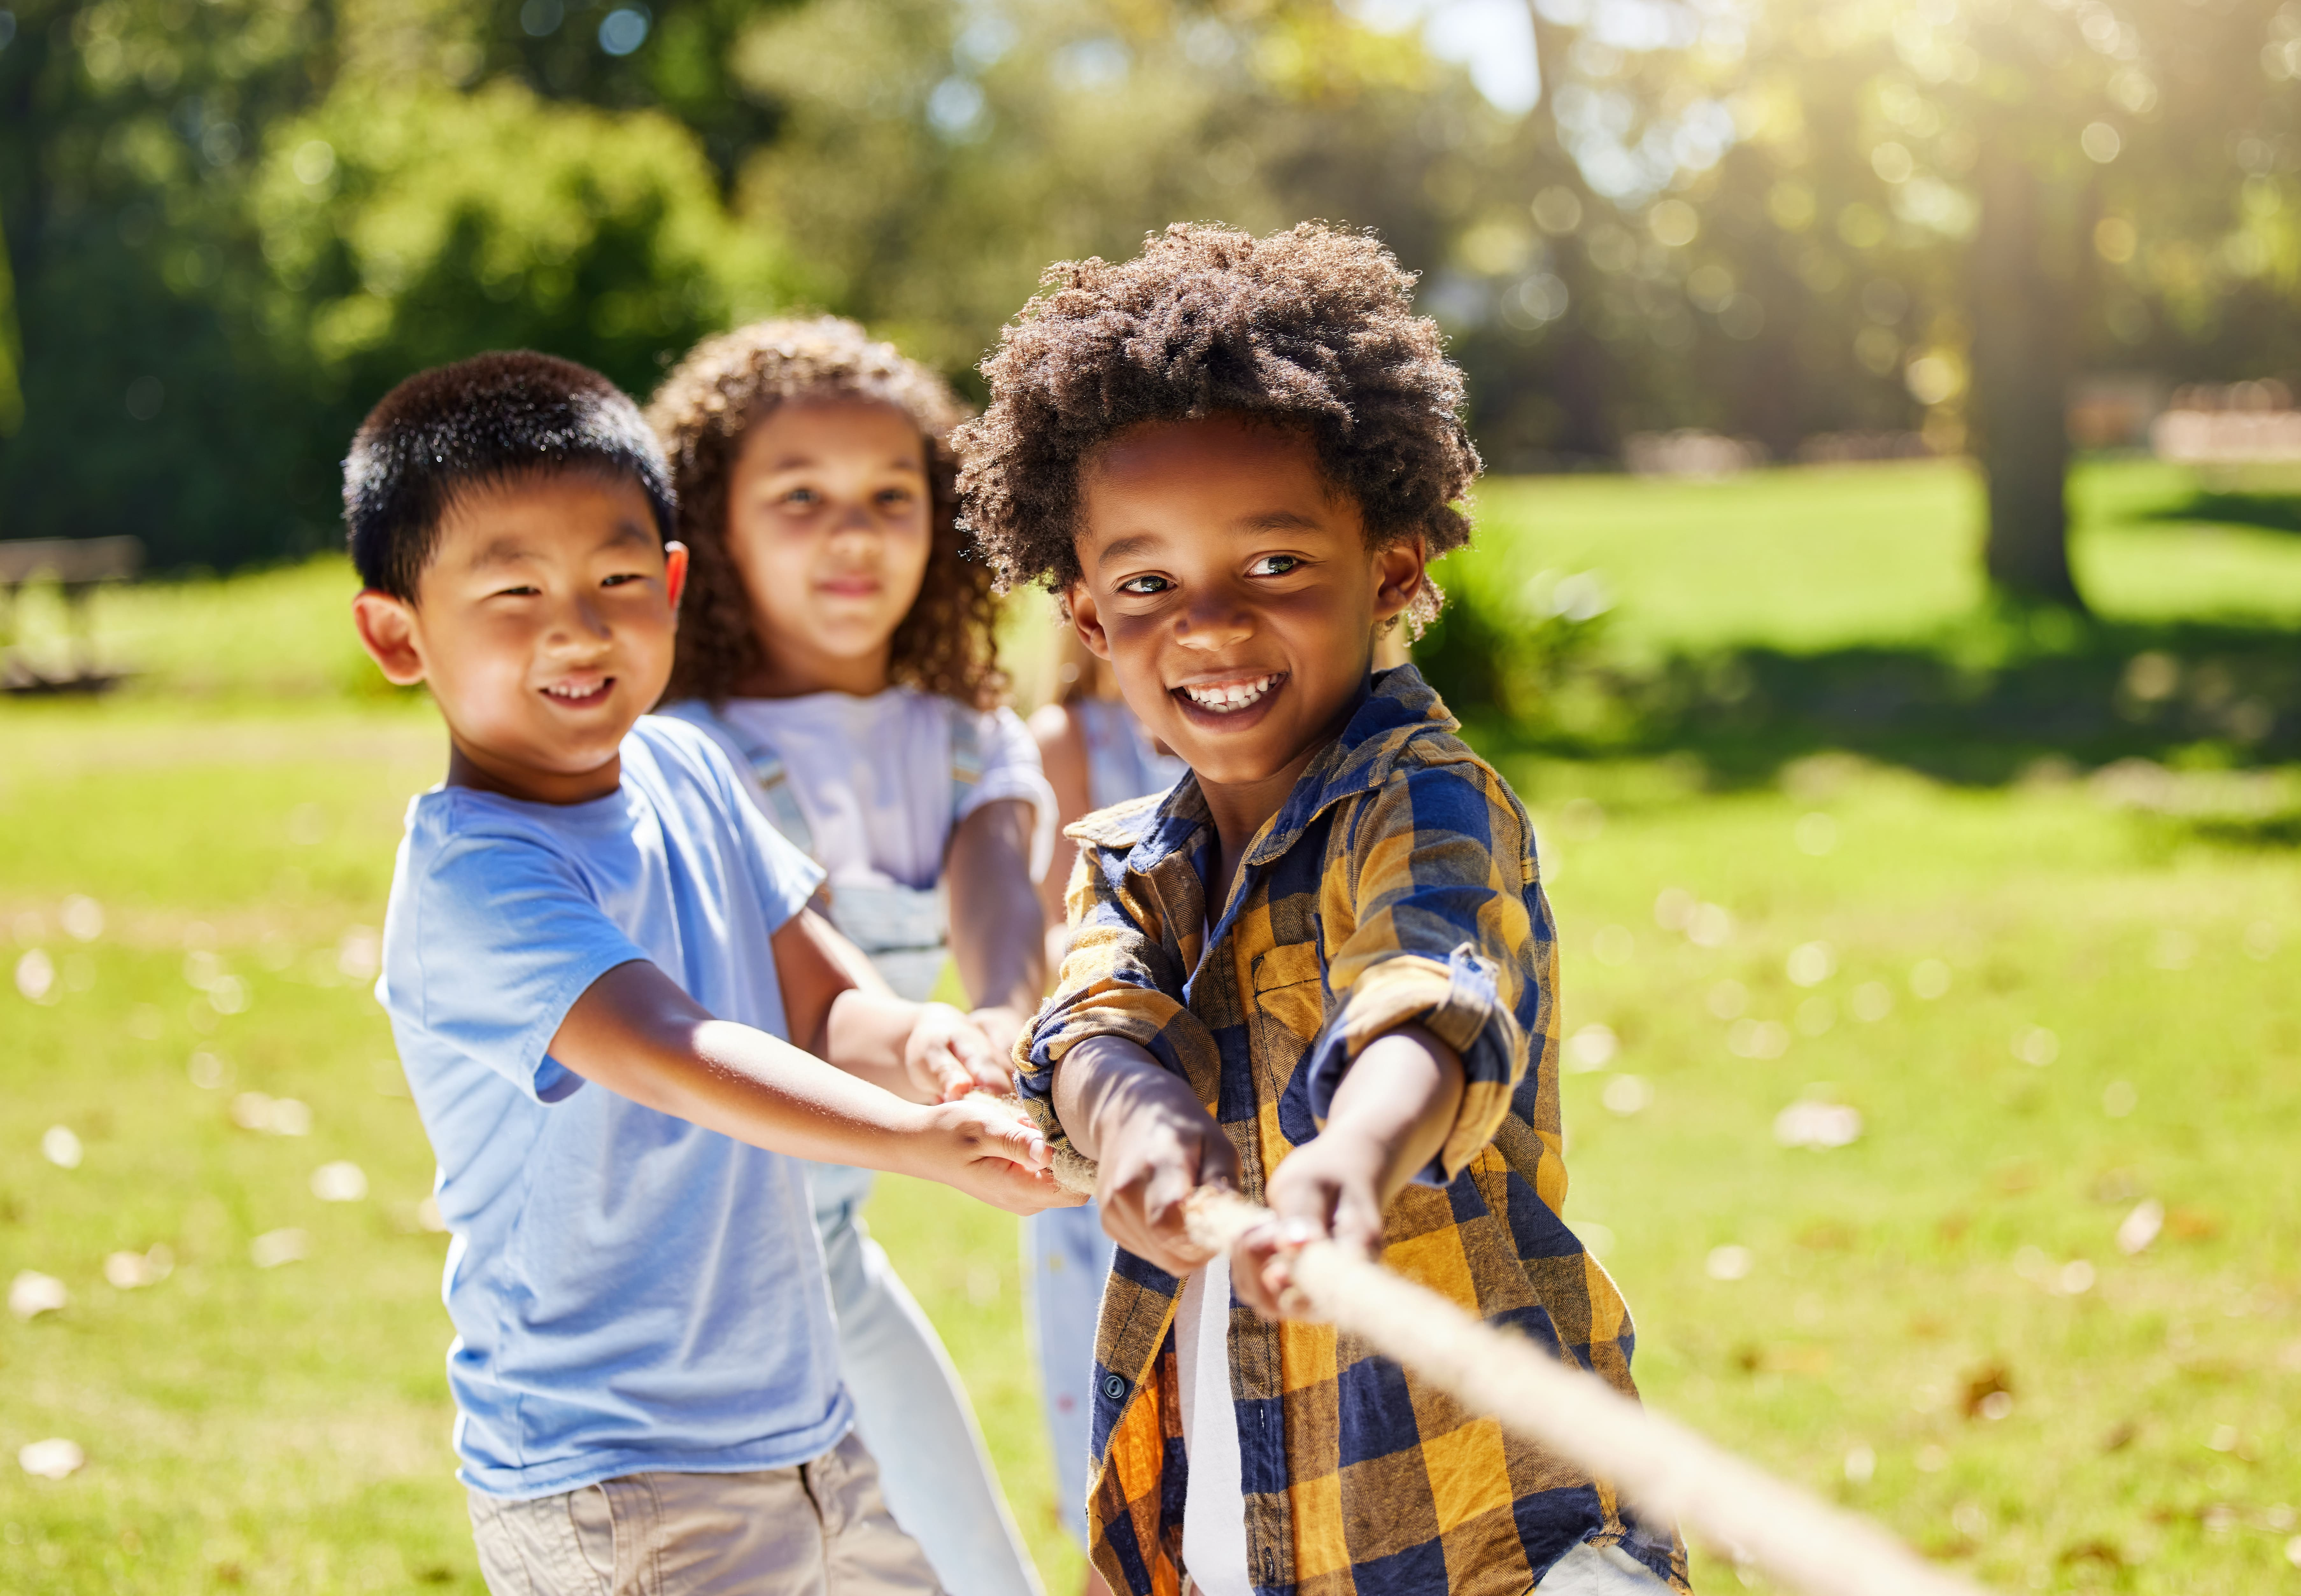

In [8]:
from IPython.display import Image

img_path = "images/img1.png"
Image(filename=img_path, width=1000, height=1000)

### 3) With `Mistral (mixtral-8x7b)`

In [9]:
prompt_data = """<s>[INST]Craft a Python function to convert Celsius to Fahrenheit. If water boils at 100°C, what's that in Fahrenheit?[/INST]"""

body = json.dumps({ 
    'prompt': prompt_data,
    'max_tokens': 200,
    'top_p': 0.9,
    'temperature': 0.2,
})


modelId = 'mistral.mixtral-8x7b-instruct-v0:1'
accept = 'application/json'
contentType = 'application/json'

#### Invoke model 


In [10]:
response = bedrock_runtime.invoke_model(body=body.encode('utf-8'), # Encode to bytes
                                        modelId=modelId, 
                                        accept=accept, 
                                        contentType=contentType)

#### Print response

In [11]:
response_body = json.loads(response.get('body').read().decode('utf-8'))
print(response_body.get('outputs')[0].get('text'))

 Here's a Python function to convert Celsius to Fahrenheit:

```python
def celsius_to_fahrenheit(celsius):
    return (celsius * 9/5) + 32

# Convert 100°C to Fahrenheit
fahrenheit = celsius_to_fahrenheit(100)
print(f"100°C is equal to {fahrenheit}°F")
```

When you run this code, it will convert 100°C to Fahrenheit and display the result.

Output:

```
100°C is equal to 212.0°F
```


### 4) With `Amazon Titan`

In [12]:
prompt_data = """Write me a poem about table and chair"""

text_gen_config = {
                    "maxTokenCount": 512,
                    "stopSequences": [], 
                    "temperature": 0,
                    "topP": 0.9
                }

body = json.dumps({
                        "inputText": prompt_data,
                        "textGenerationConfig": text_gen_config  
                    })

model_id = 'amazon.titan-tg1-large'
accept = 'application/json' 
content_type = 'application/json'

#### Invoke model 


In [13]:
response = bedrock_runtime.invoke_model(
                                            body=body, 
                                            modelId=model_id, 
                                            accept=accept, 
                                            contentType=content_type
                                        )

#### Print response

In [14]:
response_body = json.loads(response['body'].read())
print(response_body['results'][0]['outputText'])


A table and chair, a perfect pair,
A place to rest, a place to eat,
Together they form a cozy spot,
A place to cherish, a place to dot.

The table is sturdy and strong,
A foundation for all our food,
The chair is soft and comfortable,
A place to sit and rest our bones.

Together they create a space,
A place to gather, a place to face,
A place to share, a place to care,
A place to be, a place to share.
